# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [89]:
import numpy as np  
import matplotlib.pyplot as plt
import torch
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

## Dataset

In [90]:
# DO NOT MODIFY
from sklearn.datasets import make_moons
X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)
Y.shape

(500,)

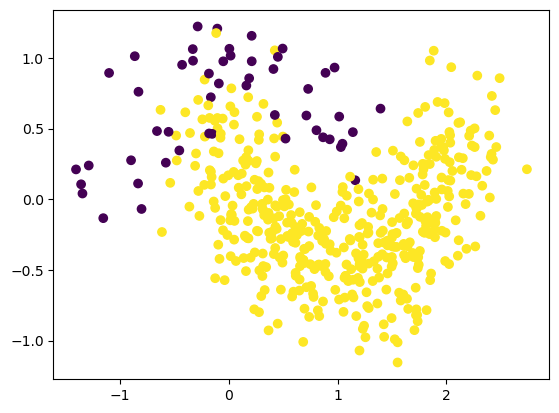

In [91]:
y = np.reshape(Y, (len(Y),1))
plt.figure()
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()
# 3rd degrees polynomial probably 
degrees = 3

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25, random_state=42)


## Training

In [93]:
pipe = Pipeline([('poly', PolynomialFeatures(degree = degrees)),
                 ('scaler',StandardScaler()),
                 (('svc', LinearSVC()))
                  ])
pipe.fit(x_train, y_train)
pipe.score(X_test, y_test)

c:\Users\Tomjl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.968

## Testing / Optimization

In [94]:
y_pred = pipe.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


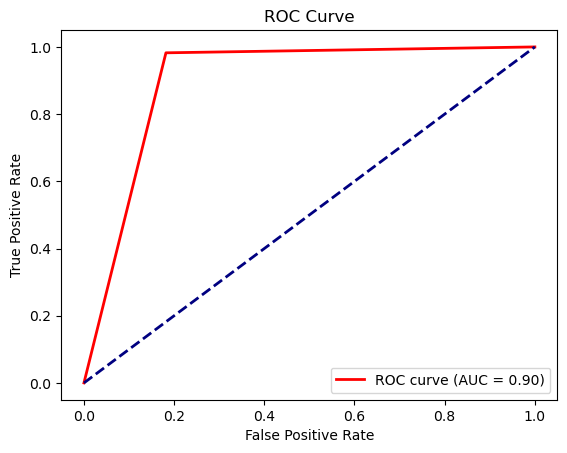

In [96]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Performance Analysis